# ASSIGNMENT-1-DMML
## BHARATH RAVILLA (MDS202133), REEWA MALIK (MDS202134)

In [1]:
import time
start = time.time()

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore",category = FutureWarning)

In [5]:
#reading the csv and storing it as df
df=pd.read_csv("C:\\Users\\reewa\\Downloads\\bank-data\\bank-data\\bank.csv",sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Date Preprocessing

In [6]:
#Summary of numerical varaibles
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
#Identifying categorical variables and their types

for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [8]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [9]:
for column in df.columns:
    print(column,df[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


In [10]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [11]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is day_of_week and number of categories are 5
The feature is poutcome and number of categories are 3
The feature is y and number of categories are 2


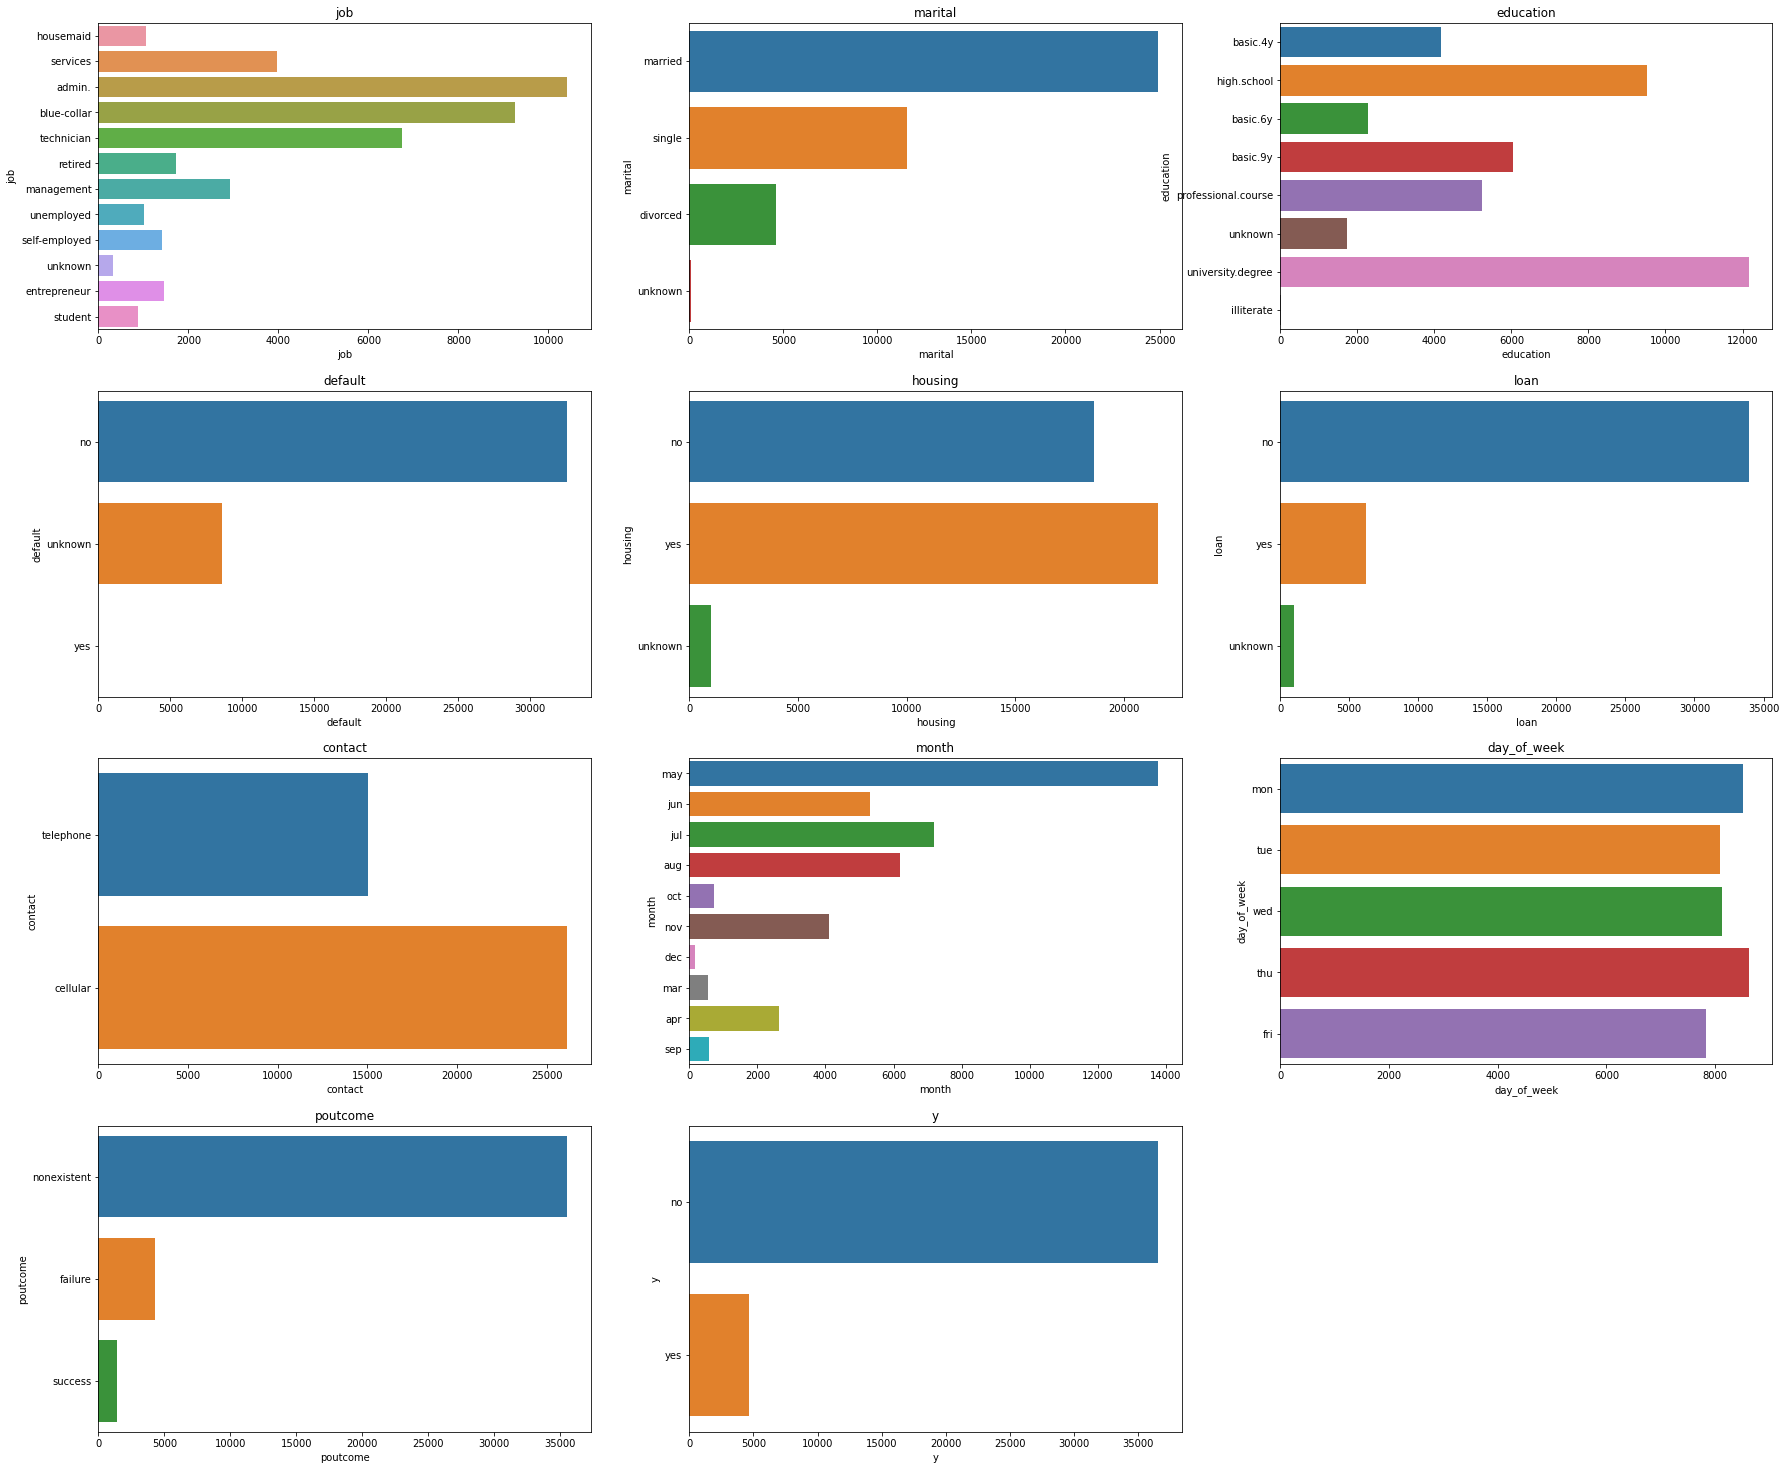

In [12]:
#Visualizing Categorical Variables
plt.figure(figsize=(30,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

In [13]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

In [14]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [15]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [16]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


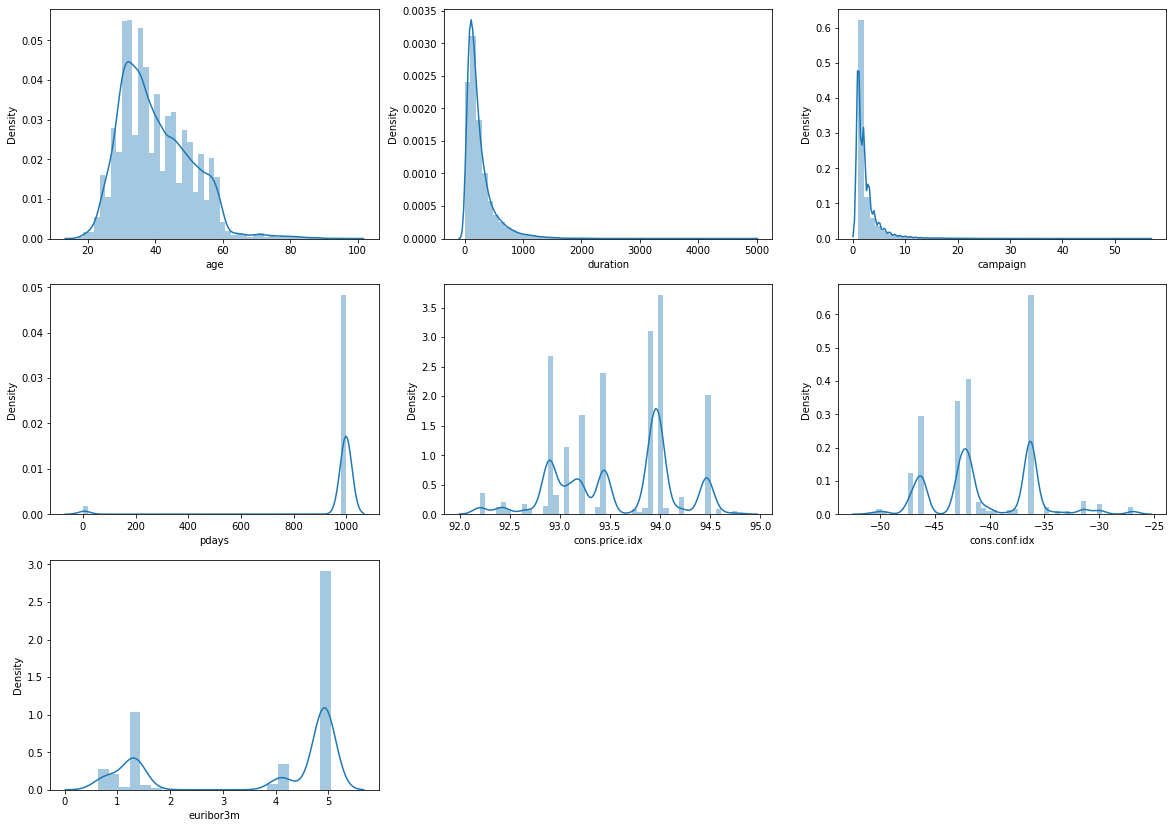

In [17]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

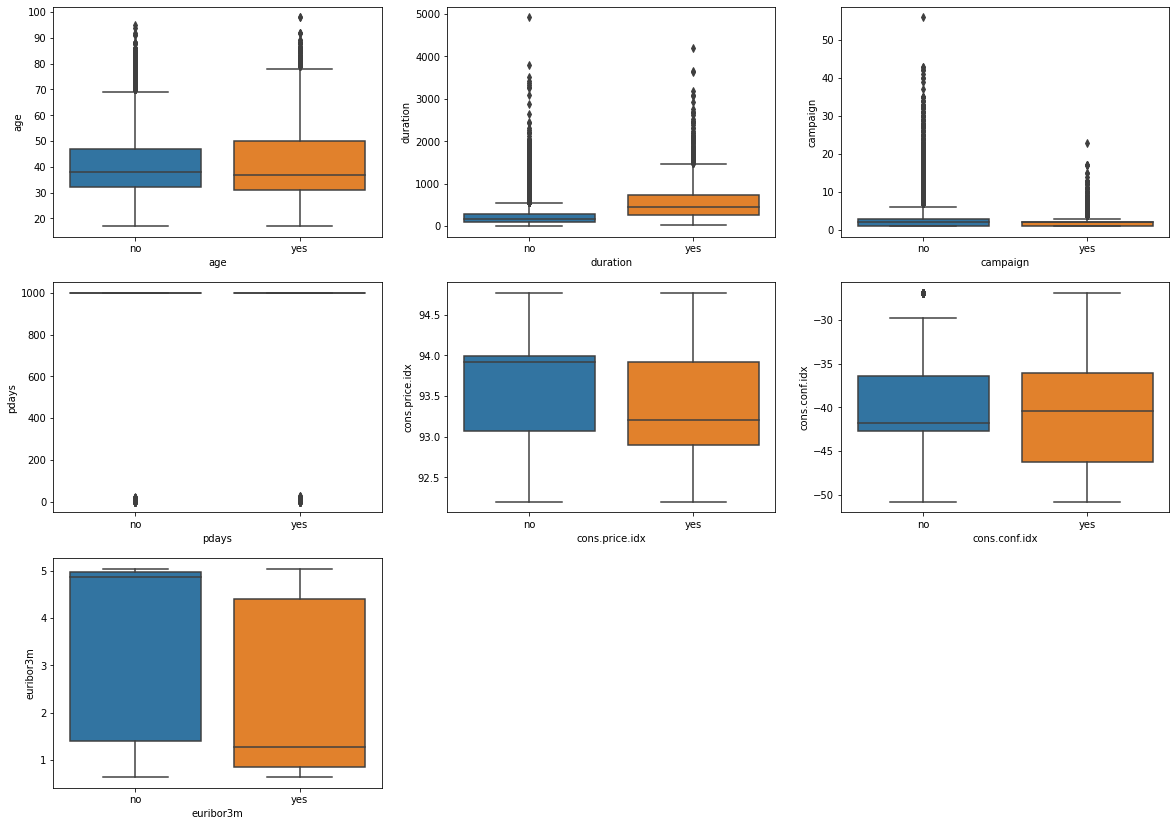

In [18]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

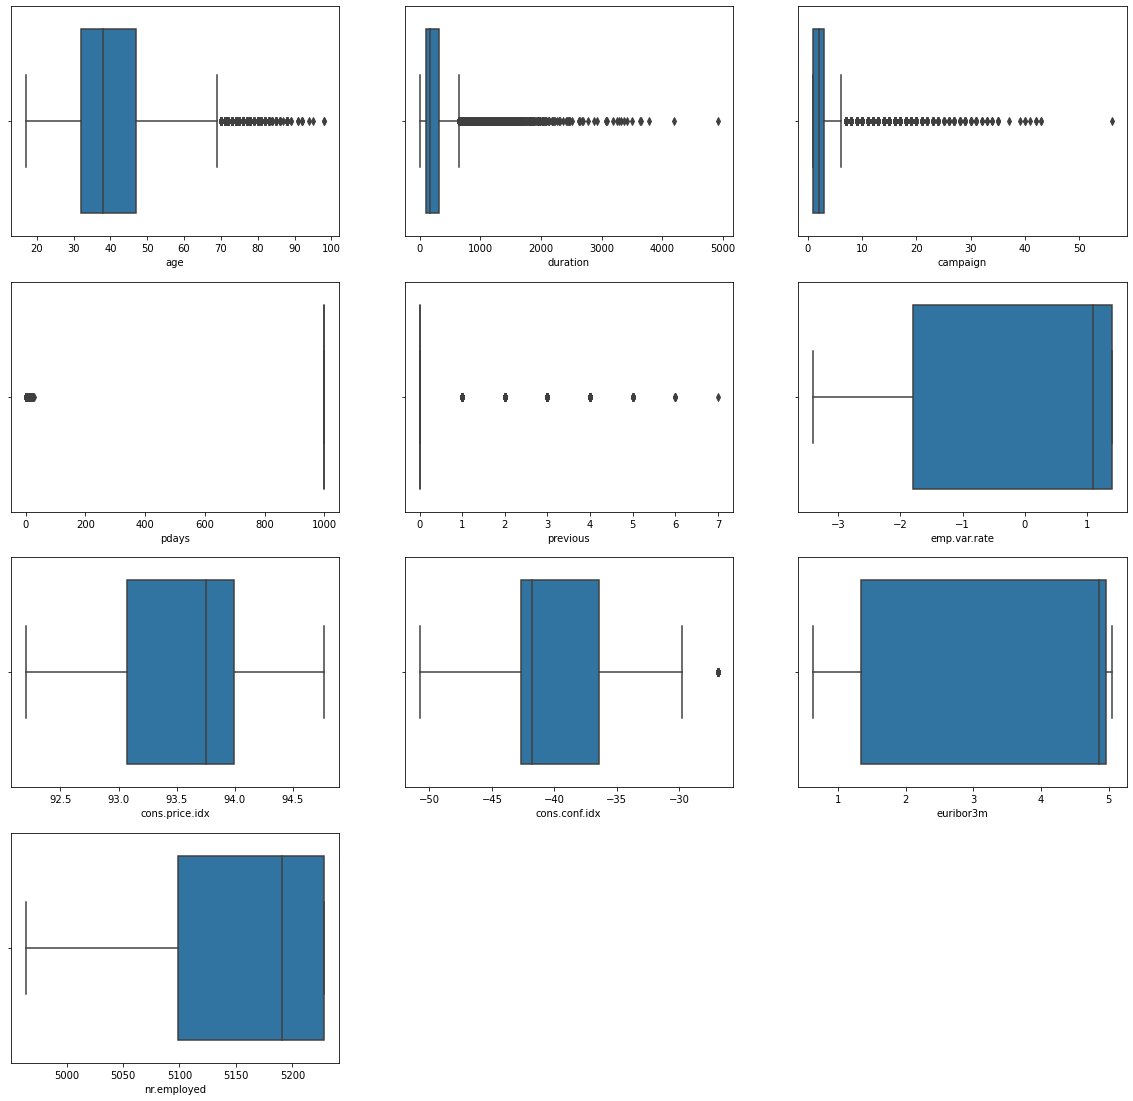

In [19]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<AxesSubplot:>

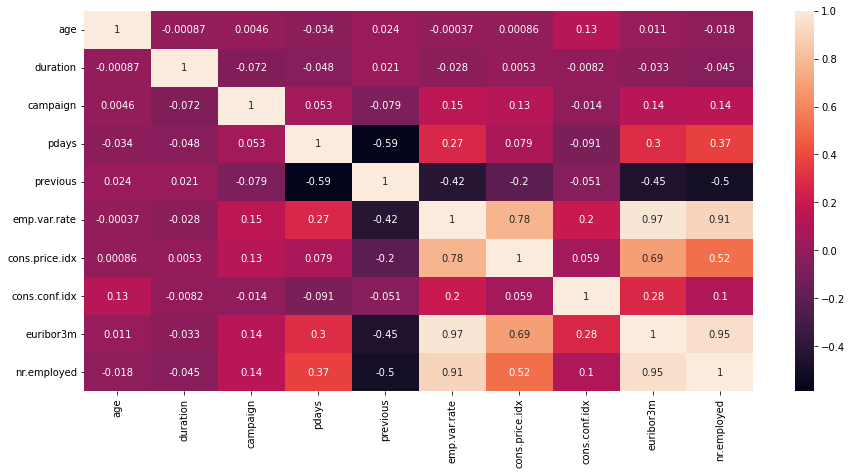

In [20]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [21]:
from sklearn.decomposition import FactorAnalysis
fact_2c=FactorAnalysis(n_components=1)
df["X_factor"]=fact_2c.fit_transform(df[["euribor3m","nr.employed","cons.price.idx","emp.var.rate"]])
df=df.drop(["euribor3m","nr.employed","cons.price.idx","emp.var.rate"],axis=1)


C:\Users\reewa\anaconda3\envs\abc\lib\site-packages\sklearn\decomposition\_factor_analysis.py:288: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn(


In [22]:
df["pdays_cat"]=[0 if each=='999' else  1  for each in df.pdays]
df=df.drop(["pdays"],axis=1)
df["y"].replace(["no","yes"],[0,1],inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.conf.idx,y,X_factor,pdays_cat
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,-36.4,0,-0.709946,1
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,0,nonexistent,-36.4,0,-0.709946,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,-36.4,0,-0.709946,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,-36.4,0,-0.709946,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,-36.4,0,-0.709946,1


In [23]:
columns=df.select_dtypes(include=[object]).columns
df=pd.concat([df,pd.get_dummies(df[columns])],axis=1)
df=df.drop(["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome","duration"],axis=1)
print("\n","Describe Dataset_v2","\n")
print(df.info(),"\n \n \n")


 Describe Dataset_v2 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   previous                       41188 non-null  int64  
 3   cons.conf.idx                  41188 non-null  float64
 4   y                              41188 non-null  int64  
 5   X_factor                       41188 non-null  float64
 6   pdays_cat                      41188 non-null  int64  
 7   job_admin.                     41188 non-null  uint8  
 8   job_blue-collar                41188 non-null  uint8  
 9   job_entrepreneur               41188 non-null  uint8  
 10  job_housemaid                  41188 non-null  uint8  
 11  job_management                 41188 non-null  uint8  
 12  job_retired           

In [24]:
min_max_scaler=preprocessing.MinMaxScaler()
df[["age","cons.conf.idx","X_factor"]]=min_max_scaler.fit_transform(df[["age","cons.conf.idx","X_factor"]])

## Splitting the data set in to training and test data

In [25]:
x=df.drop("y",axis="columns")
y=df["y"]
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [26]:
pip install imbalanced-learn 

In [27]:
#Handling the unbalance data using SMOTE
from imblearn.over_sampling import SMOTE


oversample = SMOTE(sampling_strategy='minority')
x_sm, y_sm = oversample.fit_resample(x, y)
y_sm.value_counts()

0    36548
1    36548
Name: y, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)
x_train.head()

,age,campaign,previous,cons.conf.idx,X_factor,pdays_cat,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
51355,0.241416,4,1,0.387961,0.477574,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
11040,0.271605,2,0,0.376569,0.012815,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
25418,0.160494,1,0,0.368201,0.200323,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
26972,0.234568,2,1,0.368201,0.217586,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
13249,0.111111,1,0,0.338912,0.013132,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


# Random Forest

In [29]:
rf=RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=42)
rf.fit(x_train,y_train)
rf_predict=rf.predict(x_test)
print("Confusion Matrix:",confusion_matrix(y_test,rf_predict))
print("Accuracy:",accuracy_score(y_test,rf_predict))
cf_mat=confusion_matrix(y_test,rf_predict)



Confusion Matrix: [[6833  477]
 [ 567 6743]]
Accuracy: 0.9285909712722298


In [30]:
accuracy = accuracy_score(y_test, rf_predict)
precision = precision_score(y_test, rf_predict)
recall = recall_score(y_test, rf_predict)
f1 = f1_score(y_test, rf_predict)

model_metric_1 = pd.DataFrame([['Random Forest', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_metric_1



,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.928591,0.933934,0.922435,0.928149


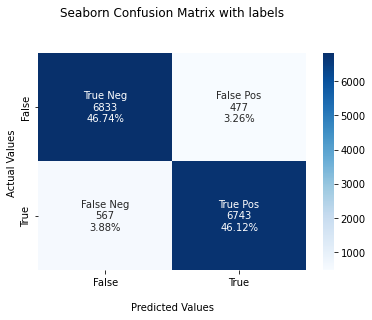

In [31]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_mat.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_mat.flatten()/np.sum(cf_mat)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_mat, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Decision Tree

In [32]:
#Decision Tree
clf = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',random_state=42)
clf.fit(x_train,y_train)
clf_predict=clf.predict(x_test)
clf_predict


array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
print("Confusion Matrix:",confusion_matrix(y_test,clf_predict))
print("Accuracy:",accuracy_score(y_test,clf_predict))
cf_mat1=confusion_matrix(y_test,clf_predict)

accuracy = accuracy_score(y_test, clf_predict)
precision = precision_score(y_test, clf_predict)
recall = recall_score(y_test, clf_predict)
f1 = f1_score(y_test, clf_predict)

model_metric_2 = pd.DataFrame([['Decision Tree', accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_metric_2

Confusion Matrix: [[6488  822]
 [ 631 6679]]
Accuracy: 0.9006155950752394


,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.900616,0.890415,0.91368,0.901897


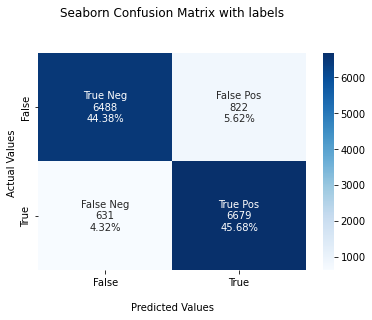

In [34]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_mat1.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_mat1.flatten()/np.sum(cf_mat1)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_mat1, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Naive Bayes

In [36]:
gnb = GaussianNB()
nb_predict = gnb.fit(x_train, y_train).predict(x_test)
print("Confusion Matrix:",confusion_matrix(y_test,nb_predict))
print("Accuracy:",accuracy_score(y_test,nb_predict))
cf_mat2=confusion_matrix(y_test,nb_predict)


Confusion Matrix: [[4016 3294]
 [1222 6088]]
Accuracy: 0.6911080711354309
Total time taken: 87.29672002792358 seconds


In [37]:

accuracy = accuracy_score(y_test, nb_predict)
precision = precision_score(y_test, nb_predict)
recall = recall_score(y_test, nb_predict)
f1 = f1_score(y_test, nb_predict)

model_metric_3 = pd.DataFrame([['Naive Bayes',  accuracy, precision, recall, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

model_metric_3

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.691108,0.648902,0.832832,0.729451


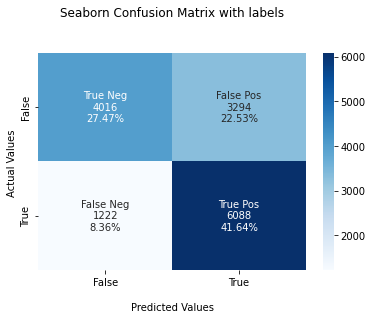

In [38]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_mat2.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_mat2.flatten()/np.sum(cf_mat1)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_mat2, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:
metric=[model_metric_1,model_metric_2,model_metric_3]
result=pd.concat(metric)
display(result)

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.928591,0.933934,0.922435,0.928149
0,Decision Tree,0.900616,0.890415,0.913680,0.901897
0,Naive Bayes,0.691108,0.648902,0.832832,0.729451


In [40]:
end = time.time()
print("Total time taken:",(end - start),"seconds")

Total time taken: 87.9907615184784 seconds
